In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

/home/eng-experiments/code/fontastic/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Creating image datasets an data loaders for train and test using the experiments folder split

In [5]:
experiments_path = '/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/'
data_path = '/home/eng-experiments/code/fontastic/data/dst/training/'

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [26]:
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name)
    train_df = pd.read_csv(file_path, delimiter=',')
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename']))
        fonts_class.append(row[1]['class'])
    
    return files_path, fonts_class

In [27]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [37]:
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train')
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [38]:
train_dir = os.path.join(experiments_path, 'train')
test_dir = os.path.join(experiments_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [39]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from /home/eng-experiments/code/fontastic/data/dst/training/open-sans/OpenSans-BoldItalic_50_rand_crop_7.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/open-sans
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Fahkwang/Fahkwang-Bold_80_rand_crop_5.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Fahkwang
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/roboto/Roboto-BlackItalic_300_rand_crop_2.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/roboto
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Fahkwang/Fahkwang-MediumItalic_80_rand_crop_1.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Fahkwang
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Fahkwang/Fahkwang-Me

File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Montserrat/Montserrat-ThinItalic_300_rand_crop_4.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Montserrat
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Lato/Lato-BlackItalic_150_rand_crop_8.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Lato
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Merriweather/Merriweather-Light_300_rand_crop_9.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Merriweather
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/open-sans/OpenSans-Regular_150_rand_crop_8.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/open-sans
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Montserra

File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Montserrat/Montserrat-ExtraLightItalic_50_rand_crop_1.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Montserrat
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Nunito/Nunito-Bold_80_rand_crop_9.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Nunito
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Major_Mono_Display/MajorMonoDisplay-Regular_50_rand_crop_2.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Major_Mono_Display
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Lato/Lato-Black_150_rand_crop_2.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train/Lato
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Merri

In [40]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Lato/Lato-Italic_300_rand_crop_0.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/test/Lato
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Lato/Lato-BoldItalic_80_rand_crop_1.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/test/Lato
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/open-sans/OpenSans-LightItalic_150_rand_crop_4.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/test/open-sans
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Fahkwang/Fahkwang-MediumItalic_80_rand_crop_8.jpg:/home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/test/Fahkwang
File being copied from /home/eng-experiments/code/fontastic/data/dst/training/Montserrat/Montserrat-ExtraLight_300_ra

In [41]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [42]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 3014
    Root Location: /home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/train
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [43]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 752
    Root Location: /home/eng-experiments/code/fontastic/experiments/7e4eedfa-10ed-45e9-a9ee-0b84bd20289c/test
    Transforms (if any): Compose(
                             Resize(size=256, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [97]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=32, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [98]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f4e7489f9b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f4e7489fb00>}

In [99]:
class_names = image_datasets['train'].classes

In [100]:
class_names

['Fahkwang',
 'Lato',
 'Lobster',
 'Lora',
 'MajorMonoDisplay',
 'Major_Mono_Display',
 'Merriweather',
 'Montserrat',
 'Nunito',
 'OpenSans',
 'Roboto',
 'open-sans',
 'roboto']

In [101]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [102]:
device

device(type='cuda', index=0)

In [103]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


### Visualizing images

In [104]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [105]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

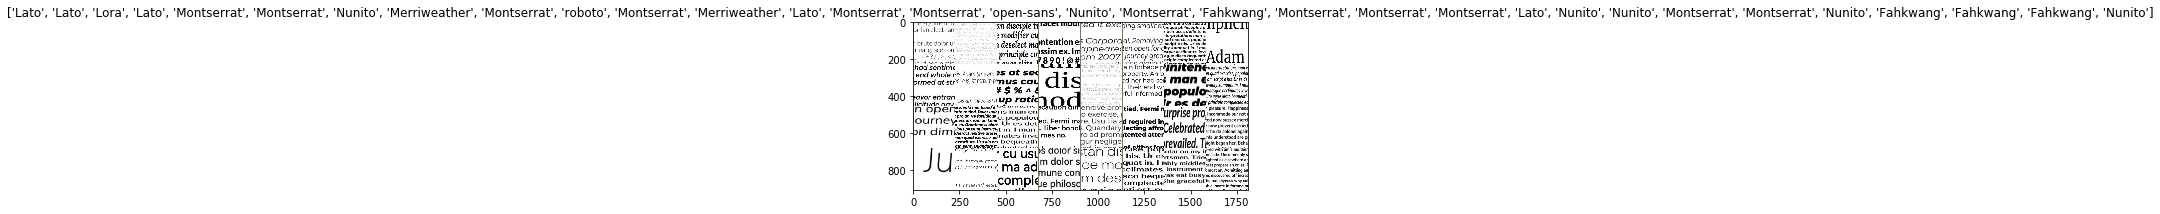

In [106]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [113]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #print(outputs)
                    #print(_)
                    #print(preds)
                    #print(labels)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            '''
            if epoch % 10 == 0 and epoch > 0 and phase == 'train':
                new_freeze_state = not(prev_freeze_state)
                print("Toggling the freezing of the layers from {} to {}"
                      .format(prev_freeze_state, new_freeze_state))
                for param in model.parameters():
                    param.requires_grad = new_freeze_state
                
                model.fc.requires_grad = True
                prev_freeze_state = new_freeze_state
            '''
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [114]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            otuput = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [115]:
import ssl


In [116]:
ssl._create_default_https_context = ssl._create_unverified_context

In [123]:
model_ft = models.resnet50(pretrained=True)

num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [124]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 1.2096 Acc:0.5693

test Loss: 5.0200 Acc:0.2779

Epoch 1/19
----------
train Loss: 0.4080 Acc:0.8640

test Loss: 6.5615 Acc:0.2420

Epoch 2/19
----------
train Loss: 0.2761 Acc:0.9124

test Loss: 6.1191 Acc:0.2939

Epoch 3/19
----------
train Loss: 0.2014 Acc:0.9323

test Loss: 7.2355 Acc:0.2766

Epoch 4/19
----------
train Loss: 0.1825 Acc:0.9406

test Loss: 6.8594 Acc:0.2793

Epoch 5/19
----------
train Loss: 0.1358 Acc:0.9545

test Loss: 6.9835 Acc:0.2872

Epoch 6/19
----------
train Loss: 0.1243 Acc:0.9642

test Loss: 7.1889 Acc:0.2793

Epoch 7/19
----------
train Loss: 0.0967 Acc:0.9728

test Loss: 7.5791 Acc:0.2886

Epoch 8/19
----------
train Loss: 0.0768 Acc:0.9818

test Loss: 7.4524 Acc:0.2872

Epoch 9/19
----------
train Loss: 0.0846 Acc:0.9768

test Loss: 7.5471 Acc:0.2886

Epoch 10/19
----------
train Loss: 0.0780 Acc:0.9788

test Loss: 7.5059 Acc:0.2872

Epoch 11/19
----------
train Loss: 0.0712 Acc:0.9784

test Loss: 7.5996 Acc:0.2872

Ep